In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import mediapipe as mp
import tensorflow as tf
mp_pose=mp.solutions.pose

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from pathlib import Path

#Calculate Angles

In [5]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

In [6]:
def calc_angle_four_points(a, b, c, d):

  a = np.array(a)
  b = np.array(b)
  c = np.array(c)
  d = np.array(d)

  e = a-b
  f = c-d

  cos_angle = (e[0]*f[0]+e[1]*f[1])/(((e[0]**2+e[1]**2)**0.5)*(f[0]**2+f[1]**2)**0.5)
  angle = np.arccos(cos_angle)*180/np.pi
  return angle

In [7]:
def calculate_slope(pointA,pointB, direction):
  if(direction=='vertical'):
    return 90- np.arctan((pointA[1]-pointB[1])/(pointA[0]-pointB[0]))*180/np.pi
  return np.arctan((pointA[1]-pointB[1])/(pointA[0]-pointB[0]))*180/np.pi

#Train

In [8]:
image_path = []
left_knee_ang = []
right_knee_ang = []
legs_ang = []
#body_ang = []
#right_elbow_ang = []
#left_elbow_ang = []
#right_shoulder_ang = []
#left_shoulder_ang = []
pose_number = []
pose_name = []

In [9]:
import os

folder_path = '/content/drive/MyDrive/Blackbox/train/plie'
new_name_prefix = 'plie'
extension = '.jpg' # Change this to match your image file format

counter = 1

for filename in os.listdir(folder_path):
  new_filename = f'{new_name_prefix}_{counter:03d}{extension}'
  os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
  counter += 1

from PIL import Image
for i in range (1, counter):
  image_name = os.path.join(folder_path, f'{new_name_prefix}_{i:03d}{extension}')
  img = cv2.imread(image_name)
  with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #annotated_image = img.copy()
    try:
      landmarks = results.pose_landmarks.landmark
      for landmark_name in mp_pose.PoseLandmark:
        name = str(landmark_name).replace('PoseLandmark.', '').lower()
        exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

      user_left_knee = calculate_angle(left_hip,left_knee,left_ankle)
      user_right_knee = calculate_angle(right_hip,right_knee,right_ankle)
      user_legs = calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
      #user_body = calculate_slope(right_shoulder,right_hip,"horizontal")
      #user_right_elbow = calculate_angle(right_wrist, right_elbow, right_shoulder)
      #user_left_elbow = calculate_angle(left_wrist, left_elbow, left_shoulder)
      #user_right_shoulder = calculate_angle(right_hip, right_shoulder, right_elbow)
      #user_left_shoulder = calc_angle_four_points(left_shoulder, left_hip, left_shoulder, left_elbow)
    except Exception as err:
      user_left_knee, user_right_knee, user_legs = 0, 0, 0

  image_path.append(image_name)
  left_knee_ang.append(user_left_knee)
  right_knee_ang.append(user_right_knee)
  legs_ang.append(user_legs)
  #body_ang.append(user_body)
  #right_elbow_ang.append(user_right_elbow)
  #left_elbow_ang.append(user_left_elbow)
  #right_shoulder_ang.append(user_right_shoulder)
  #left_shoulder_ang.append(user_left_shoulder)
  pose_number.append(0)
  pose_name.append('plie')


In [10]:
folder_path = '/content/drive/MyDrive/Blackbox/train/passe'
new_name_prefix = 'passe'
extension = '.jpg' # Change this to match your image file format

counter = 1

for filename in os.listdir(folder_path):
  new_filename = f'{new_name_prefix}_{counter:03d}{extension}'
  os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
  counter += 1

for i in range (1, counter):
  image_name = os.path.join(folder_path, f'{new_name_prefix}_{i:03d}{extension}')
  img = cv2.imread(image_name)
  with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #annotated_image = img.copy()
    try:
      landmarks = results.pose_landmarks.landmark
      for landmark_name in mp_pose.PoseLandmark:
        name = str(landmark_name).replace('PoseLandmark.', '').lower()
        exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

      user_left_knee = calculate_angle(left_hip,left_knee,left_ankle)
      user_right_knee = calculate_angle(right_hip,right_knee,right_ankle)
      user_legs = calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
      #user_body = calculate_slope(right_shoulder,right_hip,"horizontal")
      #user_right_elbow = calculate_angle(right_wrist, right_elbow, right_shoulder)
      #user_left_elbow = calculate_angle(left_wrist, left_elbow, left_shoulder)
      #user_right_shoulder = calculate_angle(right_hip, right_shoulder, right_elbow)
      #user_left_shoulder = calc_angle_four_points(left_shoulder, left_hip, left_shoulder, left_elbow)
    except Exception as err:
      user_left_knee, user_right_knee, user_legs = 0, 0, 0

  image_path.append(image_name)
  left_knee_ang.append(user_left_knee)
  right_knee_ang.append(user_right_knee)
  legs_ang.append(user_legs)
  #body_ang.append(user_body)
  #right_elbow_ang.append(user_right_elbow)
  #left_elbow_ang.append(user_left_elbow)
  #right_shoulder_ang.append(user_right_shoulder)
  #left_shoulder_ang.append(user_left_shoulder)
  pose_number.append(1)
  pose_name.append('passe')

In [11]:
folder_path = '/content/drive/MyDrive/Blackbox/train/arabes'
new_name_prefix = 'arabes'
extension = '.jpg' # Change this to match your image file format

counter = 1

for filename in os.listdir(folder_path):
  new_filename = f'{new_name_prefix}_{counter:03d}{extension}'
  os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
  counter += 1

from PIL import Image
for i in range (1, counter):
  image_name = os.path.join(folder_path, f'{new_name_prefix}_{i:03d}{extension}')
  img = cv2.imread(image_name)
  with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #annotated_image = img.copy()
    try:
      landmarks = results.pose_landmarks.landmark
      for landmark_name in mp_pose.PoseLandmark:
        name = str(landmark_name).replace('PoseLandmark.', '').lower()
        exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

      user_left_knee = calculate_angle(left_hip,left_knee,left_ankle)
      user_right_knee = calculate_angle(right_hip,right_knee,right_ankle)
      user_legs = calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
      #user_body = calculate_slope(right_shoulder,right_hip,"horizontal")
      #user_right_elbow = calculate_angle(right_wrist, right_elbow, right_shoulder)
      #user_left_elbow = calculate_angle(left_wrist, left_elbow, left_shoulder)
      #user_right_shoulder = calculate_angle(right_hip, right_shoulder, right_elbow)
      #user_left_shoulder = calc_angle_four_points(left_shoulder, left_hip, left_shoulder, left_elbow)
    except Exception as err:
      user_left_knee, user_right_knee, user_legs = 0, 0, 0

  image_path.append(image_name)
  left_knee_ang.append(user_left_knee)
  right_knee_ang.append(user_right_knee)
  legs_ang.append(user_legs)
  #body_ang.append(user_body)
  #right_elbow_ang.append(user_right_elbow)
  #left_elbow_ang.append(user_left_elbow)
  #right_shoulder_ang.append(user_right_shoulder)
  #left_shoulder_ang.append(user_left_shoulder)
  pose_number.append(2)
  pose_name.append('arabesque')

#Get CSV

In [12]:
import pandas as pd
data={"name":image_path,
    "Lleg_angle": left_knee_ang,
      "Rleg_angle": right_knee_ang,
      "hip_angle": legs_ang,
      "label_number" : pose_number,
      "label" : pose_name
}
df = pd.DataFrame(data)

In [13]:
#from pathlib import Path
filepath = Path('content/out.csv')
filepath.parent.mkdir(parents = True, exist_ok = True)
df.to_csv(filepath)

In [14]:
print(df)

                                                  name  Lleg_angle  \
0    /content/drive/MyDrive/Blackbox/train/plie/pli...   46.256900   
1    /content/drive/MyDrive/Blackbox/train/plie/pli...   95.411611   
2    /content/drive/MyDrive/Blackbox/train/plie/pli...  174.032974   
3    /content/drive/MyDrive/Blackbox/train/plie/pli...   94.887276   
4    /content/drive/MyDrive/Blackbox/train/plie/pli...   83.015645   
..                                                 ...         ...   
220  /content/drive/MyDrive/Blackbox/train/arabes/a...  171.657549   
221  /content/drive/MyDrive/Blackbox/train/arabes/a...  164.522972   
222  /content/drive/MyDrive/Blackbox/train/arabes/a...  176.486896   
223  /content/drive/MyDrive/Blackbox/train/arabes/a...    0.000000   
224  /content/drive/MyDrive/Blackbox/train/arabes/a...  147.800519   

     Rleg_angle   hip_angle  label_number      label  
0     51.428518  135.088204             0       plie  
1    102.192029  146.449932             0       p

#Test

In [15]:
test_image_path = []
test_left_knee_ang = []
test_right_knee_ang = []
test_legs_ang = []
test_pose_number = []
test_pose_name = []

In [16]:
folder_path = '/content/drive/MyDrive/Blackbox/test/plie'
new_name_prefix = 'test_plie'
extension = '.jpg' # Change this to match your image file format

counter = 1

for filename in os.listdir(folder_path):
  new_filename = f'{new_name_prefix}_{counter:03d}{extension}'
  os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
  counter += 1

for i in range (1, counter):
  image_name = os.path.join(folder_path, f'{new_name_prefix}_{i:03d}{extension}')
  img = cv2.imread(image_name)
  with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #annotated_image = img.copy()
    try:
      landmarks = results.pose_landmarks.landmark
      for landmark_name in mp_pose.PoseLandmark:
        name = str(landmark_name).replace('PoseLandmark.', '').lower()
        exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

      user_left_knee = calculate_angle(left_hip,left_knee,left_ankle)
      user_right_knee = calculate_angle(right_hip,right_knee,right_ankle)
      user_legs = calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
    except Exception as err:
      user_left_knee, user_right_knee, user_legs = 0, 0, 0

  test_image_path.append(image_name)
  test_left_knee_ang.append(user_left_knee)
  test_right_knee_ang.append(user_right_knee)
  test_legs_ang.append(user_legs)
  test_pose_number.append(0)
  test_pose_name.append('plie')

In [17]:
folder_path = '/content/drive/MyDrive/Blackbox/test/passe'
new_name_prefix = 'test_passe'
extension = '.jpg' # Change this to match your image file format

counter = 1

for filename in os.listdir(folder_path):
  new_filename = f'{new_name_prefix}_{counter:03d}{extension}'
  os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
  counter += 1

for i in range (1, counter):
  image_name = os.path.join(folder_path, f'{new_name_prefix}_{i:03d}{extension}')
  img = cv2.imread(image_name)
  with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #annotated_image = img.copy()
    try:
      landmarks = results.pose_landmarks.landmark
      for landmark_name in mp_pose.PoseLandmark:
        name = str(landmark_name).replace('PoseLandmark.', '').lower()
        exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

      user_left_knee = calculate_angle(left_hip,left_knee,left_ankle)
      user_right_knee = calculate_angle(right_hip,right_knee,right_ankle)
      user_legs = calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
    except Exception as err:
      user_left_knee, user_right_knee, user_legs = 0, 0, 0

  test_image_path.append(image_name)
  test_left_knee_ang.append(user_left_knee)
  test_right_knee_ang.append(user_right_knee)
  test_legs_ang.append(user_legs)
  test_pose_number.append(1)
  test_pose_name.append('passe')

In [18]:
folder_path = '/content/drive/MyDrive/Blackbox/test/arabes'
new_name_prefix = 'test_arabes'
extension = '.jpg' # Change this to match your image file format

counter = 1

for filename in os.listdir(folder_path):
  new_filename = f'{new_name_prefix}_{counter:03d}{extension}'
  os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
  counter += 1

for i in range (1, counter):
  image_name = os.path.join(folder_path, f'{new_name_prefix}_{i:03d}{extension}')
  img = cv2.imread(image_name)
  with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #annotated_image = img.copy()
    try:
      landmarks = results.pose_landmarks.landmark
      for landmark_name in mp_pose.PoseLandmark:
        name = str(landmark_name).replace('PoseLandmark.', '').lower()
        exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

      user_left_knee = calculate_angle(left_hip,left_knee,left_ankle)
      user_right_knee = calculate_angle(right_hip,right_knee,right_ankle)
      user_legs = calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
    except Exception as err:
      user_left_knee, user_right_knee, user_legs = 0, 0, 0

  test_image_path.append(image_name)
  test_left_knee_ang.append(user_left_knee)
  test_right_knee_ang.append(user_right_knee)
  test_legs_ang.append(user_legs)
  test_pose_number.append(2)
  test_pose_name.append('arabesque')

#Get CSV

In [19]:
test_data={"name":test_image_path,
    "Lleg_angle": test_left_knee_ang,
      "Rleg_angle": test_right_knee_ang,
      "hip_angle": test_legs_ang,
      "label_number" : test_pose_number,
      "label" : test_pose_name
}
test_df = pd.DataFrame(test_data)

In [20]:
filepath = Path('content/test_out.csv')
filepath.parent.mkdir(parents = True, exist_ok = True)
test_df.to_csv(filepath)

In [21]:
print(test_df)

                                                 name  Lleg_angle  Rleg_angle  \
0   /content/drive/MyDrive/Blackbox/test/plie/test...  121.104709  114.821526   
1   /content/drive/MyDrive/Blackbox/test/plie/test...  103.461238  124.461333   
2   /content/drive/MyDrive/Blackbox/test/plie/test...  111.750772  113.057254   
3   /content/drive/MyDrive/Blackbox/test/plie/test...  144.673099  147.015185   
4   /content/drive/MyDrive/Blackbox/test/plie/test...  121.877604  125.565921   
5   /content/drive/MyDrive/Blackbox/test/plie/test...  163.065355  164.193107   
6   /content/drive/MyDrive/Blackbox/test/plie/test...  148.446604  148.031637   
7   /content/drive/MyDrive/Blackbox/test/plie/test...  151.328731  134.402233   
8   /content/drive/MyDrive/Blackbox/test/plie/test...  130.664920  117.300571   
9   /content/drive/MyDrive/Blackbox/test/passe/tes...  179.249702   41.064880   
10  /content/drive/MyDrive/Blackbox/test/passe/tes...   35.163296  177.326021   
11  /content/drive/MyDrive/B

In [22]:
print(len(test_image_path), len(test_left_knee_ang), test_left_knee_ang)

28 28 [121.1047092781219, 103.4612384294137, 111.75077249376812, 144.67309892762606, 121.87760352104962, 163.06535475379252, 148.44660398984547, 151.32873130322858, 130.6649203792131, 179.24970229607075, 35.163296314582965, 173.84710281276642, 174.5360968213126, 173.62555103187958, 79.05876844467286, 80.9849199421318, 174.83587103166133, 176.90874838789094, 179.27990848385465, 179.0356382010485, 165.04167736432515, 177.65376763993888, 177.1941032500241, 173.4195927407073, 175.3702960534951, 171.1460343165013, 163.66321777153016, 171.98107116549923]


In [23]:
#import mathplotlib.pyplot
#imgs
#plt.imshow(imgs[1])

#NN

In [24]:
#import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [25]:
def load_data_csv(csv_path):

  # Load the CSV file
  dataframe = pd.read_csv(csv_path)
  df_to_process = dataframe.copy()

  # Drop the file_name columns as you don't need it during training.
  df_to_process.drop(columns=['name'], inplace=True)

  # Extract the list of class names
  classes = df_to_process.pop('label').unique()

  # Extract the labels
  y = df_to_process.pop('label_number')

  # Convert the input features and labels into the correct format for training.
  X = df_to_process.astype('float64')
  y = keras.utils.to_categorical(y)

  return X, y, classes, dataframe

In [26]:
X, y, class_names, _=load_data_csv("content/out.csv") #Change


In [27]:
X_scaled = X.iloc[:, 1:]/180

In [28]:
X_ready=X_scaled.to_numpy()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_ready, y,
                                                  test_size=0.15)

In [31]:
print(type(X_scaled))

<class 'pandas.core.frame.DataFrame'>


#Building the model

In [32]:
import tensorflow as tf

# Define your input layer
input_layer = keras.layers.Input(shape=(3,))

# Define the layers of your model
hidden_layer = keras.layers.Dense(128, activation='relu')(input_layer)
output_layer = keras.layers.Dense(3, activation='softmax')(hidden_layer)  # For multi-class classification

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 899 (3.51 KB)
Trainable params: 899 (3.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
checkpoint_path = "weights.best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=20)

# Start training
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
 1/12 [=>............................] - ETA: 8s - loss: 1.0932 - accuracy: 0.3750
Epoch 1: val_accuracy improved from -inf to 0.52941, saving model to weights.best.hdf5
12/12 [==============================] - 1s 30ms/step - loss: 1.0974 - accuracy: 0.3927 - val_loss: 1.0868 - val_accuracy: 0.5294
Epoch 2/200
 1/12 [=>............................] - ETA: 0s - loss: 1.0822 - accuracy: 0.5625
Epoch 2: val_accuracy did not improve from 0.52941
12/12 [==============================] - 0s 6ms/step - loss: 1.0584 - accuracy: 0.6545 - val_loss: 1.0710 - val_accuracy: 0.4706
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 1.0198 - accuracy: 0.8750
Epoch 3: val_accuracy did not improve from 0.52941
12/12 [==============================] - 0s 5ms/step - loss: 1.0315 - accuracy: 0.6335 - val_loss: 1.0580 - val_accuracy: 0.4412
Epoch 4/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 1/12 [=>............................] - ETA: 0s - loss: 1.0586 - accuracy: 0.4375
Epoch 4: val_accuracy did not improve from 0.52941
12/12 [==============================] - 0s 6ms/step - loss: 1.0093 - accuracy: 0.6492 - val_loss: 1.0488 - val_accuracy: 0.4412
Epoch 5/200
 1/12 [=>............................] - ETA: 0s - loss: 0.9654 - accuracy: 0.6875
Epoch 5: val_accuracy did not improve from 0.52941
12/12 [==============================] - 0s 5ms/step - loss: 0.9909 - accuracy: 0.6230 - val_loss: 1.0408 - val_accuracy: 0.4412
Epoch 6/200
 1/12 [=>............................] - ETA: 0s - loss: 0.9884 - accuracy: 0.6875
Epoch 6: val_accuracy did not improve from 0.52941
12/12 [==============================] - 0s 5ms/step - loss: 0.9711 - accuracy: 0.6754 - val_loss: 1.0324 - val_accuracy: 0.4706
Epoch 7/200
 1/12 [=>............................] - ETA: 0s - loss: 0.9599 - accuracy: 0.7500
Epoch 7: val_accuracy did not improve from 0.52941
12/12 [==============================] - 

In [34]:
model.save("my_model.keras")


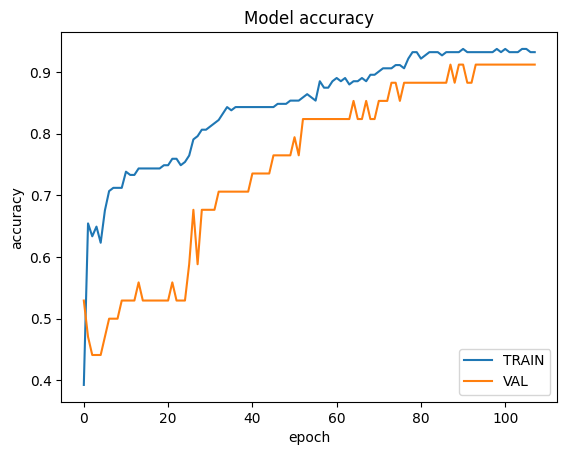

In [35]:
# Visualize the training history to see whether you're overfitting.
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

#Kfold

In [36]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have 'X' as your input data and 'y' as your target labels
kf = KFold(n_splits=10, shuffle=True)

performance_metrics = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X_ready[train_index], X_ready[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Define and compile your neural network model
    input_layer = keras.layers.Input(shape=(3,))

    # Define the layers of your model
    hidden_layer = keras.layers.Dense(128, activation='relu')(input_layer)
    output_layer = keras.layers.Dense(3, activation='softmax')(hidden_layer)  # For multi-class classification

    # Create the model
    model = keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

    performance_metrics.append(accuracy)

average_accuracy = np.mean(performance_metrics)
std_dev_accuracy = np.std(performance_metrics)

print("Average Accuracy:", average_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)


Average Accuracy: 0.9158102810382843
Standard Deviation of Accuracy: 0.05421795656115952


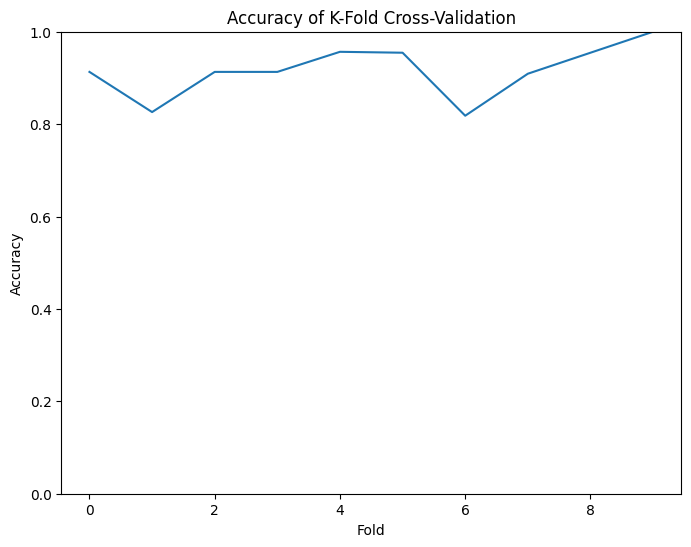

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot( performance_metrics)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of K-Fold Cross-Validation')
plt.ylim([0, 1])
plt.show()

In [38]:
print(performance_metrics)

[0.9130434989929199, 0.8260869383811951, 0.9130434989929199, 0.9130434989929199, 0.95652174949646, 0.9545454382896423, 0.8181818127632141, 0.9090909361839294, 0.9545454382896423, 1.0]


In [39]:
#Average Accuracy: 0.9021739184856414
#Standard Deviation of Accuracy: 0.03906101138032975
# [0.8695651888847351, 0.9130434989929199, 0.9130434989929199, 0.8695651888847351, 0.95652174949646, 0.9090909361839294, 0.9090909361839294, 0.8181818127632141, 0.9090909361839294, 0.9545454382896423]

#Feedback

In [40]:
#load image, detect landmarks etc

In [41]:
from google.colab import files

In [42]:
user_img = files.upload()

KeyboardInterrupt: 

In [ ]:
print(user_img)

In [ ]:
#access file name ?
img = cv2.imread('4fba2742-c39e-42d7-80a5-765f1f2eb6da.jpeg')
print(img)

In [ ]:
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
  results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  #annotated_image = img.copy()
  landmarks = results.pose_landmarks.landmark
  for landmark_name in mp_pose.PoseLandmark:
    name = str(landmark_name).replace('PoseLandmark.', '').lower()
    exec(f'{name} = [landmarks[landmark_name].x, landmarks[landmark_name].y, landmarks[landmark_name].z]')

In [ ]:
user_left_knee= calculate_angle(left_hip,left_knee,left_ankle)
user_right_knee=calculate_angle(right_hip,right_knee,right_ankle)
user_legs= calc_angle_four_points(right_hip, right_knee, left_hip, left_knee)
user_body=calculate_slope(right_shoulder,right_hip,"horizontal")
user_turnout=calc_angle_four_points(right_heel, right_foot_index, left_heel, left_foot_index)

user_right_elbow = calculate_angle(right_wrist, right_elbow, right_shoulder)
user_left_elbow = calculate_angle(left_wrist, left_elbow, left_shoulder)
user_right_shoulder = calculate_angle(right_hip, right_shoulder, right_elbow)
user_left_shoulder = calc_angle_four_points(left_shoulder, left_hip, left_shoulder, left_elbow)

user_plie=np.array([user_right_knee,user_left_knee,user_turnout])
user_arabesque=np.array([user_left_knee,user_right_knee,user_legs,user_body]) # add distance between arms, position of leg compared to knee
user_passe= np.array([user_legs,max(user_left_knee,user_right_knee),user_left_elbow,user_right_elbow,user_body])

message_plie=[" Bend your knees more!", " ", "Turnout your feet:Move your heels forward wihou moving your toes"]
message_passe= [ " ", " ","Straighten your left elbow","Straighten your right elbow", "Straighten your body"]
message_arabesque=["Keep your left leg straight","Keep your right leg straight","Lift your leg higher", "Lift your body"]

passe=np.array([ 90, 160.1, 83.9,164.6 ,  71.3 ])
plie=np.array([107.8871148 ,108.03751473 ,157.55223741])
arabesque= np.array([174.1, 179.5, 92.2, 70.5])

In [ ]:
def FeedbackAngle(user_angle,alpha, beta, gama, text): #1. user_angle- calculated angle, 2. alpha- desired angle, 3.beta - okay angle, 4. gama- bad angle, text- personal feedback text
  if (user_angle>=alpha):
    print("Amazing")
  elif (alpha>user_angle>=beta):
    print( text)
  else :
    print( text)

In [ ]:
#def FeedbackPasse(users, arrayPose):

#  item=0
#  for ang in arrayPose:
#   if(item==0):
#    FeedbackAngle(users[item],0.95*ang,0.8*ang,0.7*ang,message_passe[item]) # angle between legs
#   if(item==2 or item==3):
#     FeedbackAngle(users[item], 0.9*ang,0.8*ang,0.7*ang,message_passe[item])
#   item=item+1

In [ ]:
def FeedbackPasse(users, arrayPose):
  item = 0
  for ang in arrayPose:
    FeedbackAngle(users[item], 0.9*ang, 0.8*ang, 0.7*ang, message_passe[item])
    item = item + 1

In [ ]:
#def FeedbackPlie(users, arrayPose):
#
#  item=0
#  for ang in arrayPose:
#   if(item==0):
#    if( users[item]>plie[item]):
#     print(message_plie[item])
#
#   if(item==2):
#     FeedbackAngle(users[item], 0.9*ang,0.8*ang,0.7*ang,message_passe[item])
#   item=item+1

In [ ]:
def FeedbackPlie(users, arrayPose):
  item = 0
  for ang in arrayPose:
    FeedbackAngle(users[item], 0.9*ang, 0.8*ang, 0.7*ang, message_plie[item])
    item = item + 1

In [ ]:
def FeedbackArabesque(users, arrayPose):
  item = 0
  for ang in arrayPose:
    FeedbackAngle(users[item], 0.9*ang, 0.8*ang, 0.7*ang, message_arabesque[item])
    item = item + 1

In [ ]:
# Feedback arabesque

In [ ]:
print(user_left_knee, user_right_knee, user_legs)


In [ ]:
user_array = np.array([user_left_knee, user_right_knee, user_legs])
user_label = model.predict(user_array)
print(user_label)